<h1> WordCloud of tweets hashtags on blockchain topic </h1>

<b>In this notebook, we will go through following things-<br></b>
<li> 1. Installing required packages</li>
<li> 2. Collecting tweets through twitter API</li>
<li> 3. Cleaning the tweets </li>
<li> 4. Counting frequencies of hashtags </li>
<li> 5. Wordcloud </li>

<h3>Installing required packages using cran repository.</h3>

In [1]:
install.packages("twitteR", repos='http://cran.us.r-project.org')
install.packages("wordcloud", repos='http://cran.us.r-project.org')

package 'twitteR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ashwini\AppData\Local\Temp\RtmpWMZIJu\downloaded_packages
package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ashwini\AppData\Local\Temp\RtmpWMZIJu\downloaded_packages


In [2]:
install.packages("tm", repos='http://cran.us.r-project.org')

package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ashwini\AppData\Local\Temp\RtmpWMZIJu\downloaded_packages


In [3]:
install.packages("devtools", repos='http://cran.us.r-project.org')

package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ashwini\AppData\Local\Temp\RtmpWMZIJu\downloaded_packages


In [4]:
install.packages("stringr", repos='http://cran.us.r-project.org')

package 'stringr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ashwini\AppData\Local\Temp\RtmpWMZIJu\downloaded_packages


<h3>Import the required packages</h3>

In [5]:
library(twitteR) #for twitter API
library(wordcloud) #to plot wordcloud
library(RColorBrewer) #for colors in wordcloud
library(tm) #required for some functions
library(stringr) #required for some functions

Loading required package: RColorBrewer
Loading required package: NLP


Collecting tweets through twitter API

In [6]:
consumer_key <- "DwlugSrWabpPwtouJ2er1oaRY"
consumer_secret <- "8AQByPM7enFf98TYu1FpW7uRlZuuVHb74bY86YLnYn4oxrTNJP"
access_token <- "609964556-NSr8QudpJhoyt3JkLMwNRYhd43283KHg7XENvfdH"
access_secret <- "SEkHJ71Q5Loxco59N807187dJfi2bYLZXcEZKF2FeFYXg"
setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)
tweets = searchTwitter("#blockchain",n=5000)
cat("Authentication successful.")

[1] "Using direct authentication"
Authentication successful.

<h3>Looking into the tweets!</h3>

In [7]:
head(tweets,10)

[[1]]
[1] "ahacdusen1970: RT @ipfconline1: #Disruption in #Banking is now Everywhere <ed><U+00A0><U+00BC><ed><U+00BC><U+0090><ed><U+00A0><U+00BD><ed><U+00B2><U+00B8>\n[via @hTm_bKr] #Fintech #Blockchain #Startup #Bitcoin #Tech https://t.co/GJRN"

[[2]]
[1] "AffgeniusMarket: Do it for yourself, not for them. #Motivation #Inspiration #Entrepreneur #RealEstate @HomeTokenIO #ICO #Ethereum #Blockchain #Cryptocurrency"

[[3]]
[1] "Affgenius: Do it for yourself, not for them. #Motivation #Inspiration #Entrepreneur #RealEstate @HomeTokenIO #ICO #Ethereum #Blockchain #Cryptocurrency"

[[4]]
[1] "Amellya_aa: RT @PowerLedger_io: We're super excited about our partnership with Origin Energy for our upcoming #blockchain trial! https://t.co/8Zt3GbN4s"

[[5]]
[1] "yohananaomi: RT @arenaplay_io: Games based on #blockchain can be much more profitable than f2p games, giving people real value. #gaming #f2p\nhttps://t.c"

[[6]]
[1] "HendraKholis: RT @dovuapi: DOVU Explained: Part 2 by Arwen Smit\nhttps:

<h3>Save tweets in Rdata file</h3>

In [8]:
save(tweets, file = "tweets.Rdata")

In [9]:
load("tweets.Rdata")
tweetsList <- tweets

Converting the tweetsList to data frame

In [10]:
tweetsFrame <- twListToDF(tweetsList)

In [11]:
head(tweetsFrame,10)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
RT @ipfconline1: #Disruption in #Banking is now Everywhere <ed><U+00A0><U+00BC><ed><U+00BC><U+0090><ed><U+00A0><U+00BD><ed><U+00B2><U+00B8> [via @hTm_bKr] #Fintech #Blockchain #Startup #Bitcoin #Tech https://t.co/GJRN…,FALSE,0,NA,2017-09-24 23:26:32,FALSE,NA,912095938663116801,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",ahacdusen1970,76,TRUE,FALSE,NA,NA
"Do it for yourself, not for them. #Motivation #Inspiration #Entrepreneur #RealEstate @HomeTokenIO #ICO #Ethereum #Blockchain #Cryptocurrency",FALSE,0,NA,2017-09-24 23:26:30,FALSE,NA,912095930916188161,NA,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",AffgeniusMarket,0,FALSE,FALSE,NA,NA
"Do it for yourself, not for them. #Motivation #Inspiration #Entrepreneur #RealEstate @HomeTokenIO #ICO #Ethereum #Blockchain #Cryptocurrency",FALSE,1,NA,2017-09-24 23:26:30,FALSE,NA,912095930240897026,NA,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",Affgenius,0,FALSE,FALSE,NA,NA
RT @PowerLedger_io: We're super excited about our partnership with Origin Energy for our upcoming #blockchain trial! https://t.co/8Zt3GbN4s…,FALSE,0,NA,2017-09-24 23:26:28,FALSE,NA,912095922154176512,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Amellya_aa,221,TRUE,FALSE,NA,NA
"RT @arenaplay_io: Games based on #blockchain can be much more profitable than f2p games, giving people real value. #gaming #f2p https://t.c…",FALSE,0,NA,2017-09-24 23:26:24,FALSE,NA,912095903657345024,NA,"<a href=""http://www.twitter.com"" rel=""nofollow"">Twitter for BlackBerry</a>",yohananaomi,204,TRUE,FALSE,NA,NA
RT @dovuapi: DOVU Explained: Part 2 by Arwen Smit https://t.co/dBVN4S2bdD #mobility #cryptocurrency #ethereum #DOVU #blockchain #crowdsale,FALSE,0,NA,2017-09-24 23:26:18,FALSE,NA,912095878495662080,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",HendraKholis,731,TRUE,FALSE,NA,NA
RT @dovuapi: DOVU welcomes two new members of the board #mobility #blockchain https://t.co/wSNJTcWSBH,FALSE,0,NA,2017-09-24 23:26:14,FALSE,NA,912095865635872768,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",HendraKholis,676,TRUE,FALSE,NA,NA
RT @dovuapi: Introducing DOVU at the Transport Cafe hosted by Transport Catapult (@TSCatapult). #mobility #transport #data #blockchain #cry…,FALSE,0,NA,2017-09-24 23:26:08,FALSE,NA,912095838985347072,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",HendraKholis,687,TRUE,FALSE,NA,NA
RT @Neil_W_UNODC: #Happeningnow #DigitalThailandBigBang2017 @UNODC @alex_c_unodc #blockchain #investigation event Thanks for working anothe…,FALSE,0,NA,2017-09-24 23:26:05,FALSE,NA,912095827107078146,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",jdouglasSEA,2,TRUE,FALSE,NA,NA
RT @dovuapi: DOVU Explained: Part 1 by Irfon Watkins https://t.co/vqzRbwTuFI #mobility #cryptocurrency #ethereum #DOVU #blockchain #crowdsa…,FALSE,0,NA,2017-09-24 23:26:02,FALSE,NA,912095813018337280,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",HendraKholis,699,TRUE,FALSE,NA,NA


<h3>Cleaning the tweets</h3>

In [12]:
tweetsFrame$text <- sapply(tweetsFrame$text,function(row) iconv(row, "latin1", "ASCII", sub=""))

In [13]:
clean.text <- function(text){
    text = gsub("&amp", "", text)
#     text = gsub("[[:punct:]]", "", text)
    text = gsub("[[:digit:]]", "", text)
    text = gsub("http\\w+", "", text)
#     text = gsub("[ t]{2,}", "", text)
#     text = gsub("^\\s+|\\s+$", "", text)
    return(text)
}

In [14]:
tweetsFrame$text = removeWords(tweetsFrame$text, stopwords("english"))

In [15]:
tweetsFrame$text <- clean.text(tweetsFrame$text)

In [16]:
head(tweetsFrame,10)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
RT @ipfconline: #Disruption #Banking now Everywhere [via @hTm_bKr] #Fintech #Blockchain #Startup #Bitcoin #Tech ://t.co/GJRN,FALSE,0,NA,2017-09-24 23:26:32,FALSE,NA,912095938663116801,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",ahacdusen1970,76,TRUE,FALSE,NA,NA
"Do , . #Motivation #Inspiration #Entrepreneur #RealEstate @HomeTokenIO #ICO #Ethereum #Blockchain #Cryptocurrency",FALSE,0,NA,2017-09-24 23:26:30,FALSE,NA,912095930916188161,NA,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",AffgeniusMarket,0,FALSE,FALSE,NA,NA
"Do , . #Motivation #Inspiration #Entrepreneur #RealEstate @HomeTokenIO #ICO #Ethereum #Blockchain #Cryptocurrency",FALSE,1,NA,2017-09-24 23:26:30,FALSE,NA,912095930240897026,NA,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",Affgenius,0,FALSE,FALSE,NA,NA
RT @PowerLedger_io: We're super excited partnership Origin Energy upcoming #blockchain trial! ://t.co/ZtGbNs,FALSE,0,NA,2017-09-24 23:26:28,FALSE,NA,912095922154176512,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Amellya_aa,221,TRUE,FALSE,NA,NA
"RT @arenaplay_io: Games based #blockchain can much profitable fp games, giving people real value. #gaming #fp ://t.c",FALSE,0,NA,2017-09-24 23:26:24,FALSE,NA,912095903657345024,NA,"<a href=""http://www.twitter.com"" rel=""nofollow"">Twitter for BlackBerry</a>",yohananaomi,204,TRUE,FALSE,NA,NA
RT @dovuapi: DOVU Explained: Part Arwen Smit ://t.co/dBVNSbdD #mobility #cryptocurrency #ethereum #DOVU #blockchain #crowdsale,FALSE,0,NA,2017-09-24 23:26:18,FALSE,NA,912095878495662080,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",HendraKholis,731,TRUE,FALSE,NA,NA
RT @dovuapi: DOVU welcomes two new members board #mobility #blockchain ://t.co/wSNJTcWSBH,FALSE,0,NA,2017-09-24 23:26:14,FALSE,NA,912095865635872768,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",HendraKholis,676,TRUE,FALSE,NA,NA
RT @dovuapi: Introducing DOVU Transport Cafe hosted Transport Catapult (@TSCatapult). #mobility #transport #data #blockchain #cry,FALSE,0,NA,2017-09-24 23:26:08,FALSE,NA,912095838985347072,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",HendraKholis,687,TRUE,FALSE,NA,NA
RT @Neil_W_UNODC: #Happeningnow #DigitalThailandBigBang @UNODC @alex_c_unodc #blockchain #investigation event Thanks working anothe,FALSE,0,NA,2017-09-24 23:26:05,FALSE,NA,912095827107078146,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",jdouglasSEA,2,TRUE,FALSE,NA,NA
RT @dovuapi: DOVU Explained: Part Irfon Watkins ://t.co/vqzRbwTuFI #mobility #cryptocurrency #ethereum #DOVU #blockchain #crowdsa,FALSE,0,NA,2017-09-24 23:26:02,FALSE,NA,912095813018337280,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",HendraKholis,699,TRUE,FALSE,NA,NA


<h3>Extracting hashtags</h3>

In [17]:
hashtag.regex <- regex("#(\\d|\\w)+")

In [18]:
result_df <- data.frame(table(unlist(strsplit(tolower(str_extract_all(tweetsFrame$text,"#[a-zA-Z0-9]{2,}")), " "))))

In [19]:
head(result_df,10)

Var1,Freq
"""#accelerator"",",1
"""#accounting"",",1
"""#actnow"")",2
"""#ad"")",1
"""#ads"",",8
"""#adventure"",",1
"""#advertising"",",5
"""#africa"")",1
"""#agenda"",",1
"""#aggregation"")",1


<h3>Arranging hashtags in descending order of their frequencies.</h3>

In [20]:
result_df <- result_df[rev(order(result_df$Freq)),]
head(result_df)
result_df = na.omit(result_df)

,Var1,Freq
118,"""#blockchain"",",2106
1082,"c(""#blockchain"",",1554
430,"""#fintech"",",911
117,"""#blockchain"")",839
99,"""#bitcoin"",",681
239,"""#cryptocurrency"",",585


In [21]:
result_df_temp=result_df[2:200,]
head(result_df_temp,10)

,Var1,Freq
1082,"c(""#blockchain"",",1554
430,"""#fintech"",",911
117,"""#blockchain"")",839
99,"""#bitcoin"",",681
239,"""#cryptocurrency"",",585
13,"""#ai"",",527
1033,#blockchain,468
397,"""#ethereum"",",464
588,"""#iot"",",457
1078,"c(""#bitcoin"",",356


<h3>Wordcloud of top 200 hashtags</h3>

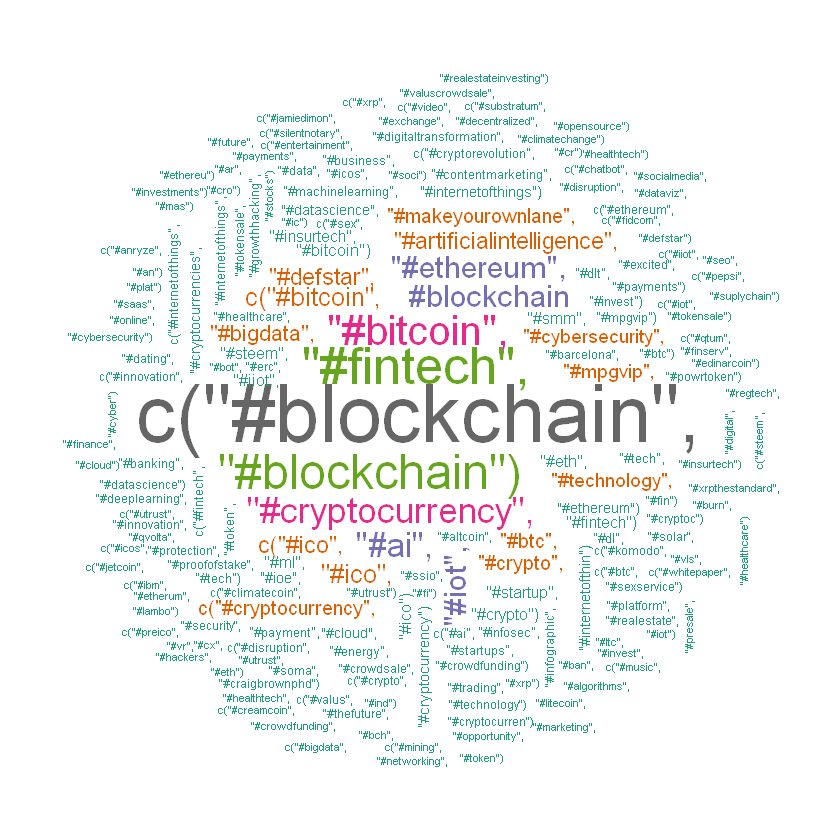

In [22]:
wordcloud(result_df_temp$Var1, result_df_temp$Freq, random.order=FALSE,colors=brewer.pal(8, "Dark2"))